In [1]:
## Google Drive 동기화
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
## Google Colab에서 TensorFlow 2.x 버전을 사용하기 위해서는 아래 magic command를 수행하면 간편하게 할 수 있습니다

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [3]:
## 필요한 Library들을 import 합니다
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## TensorFlow, Keras version 확인
print(tf.__version__)
print(keras.__version__)

2.1.0
2.2.4-tf


# Linear Regression from Text

In [0]:
## input file 경로
DATA_FILE = '/content/drive/My Drive/TensorFlow_Training_15th/data/birth_life_2010.txt'

In [0]:
## data preprocessing
def read_birth_life_data(filename):
    """
    Read in birth_life_2010.txt and return:
    data in the form of NumPy array
    n_samples: number of samples
    """
    text = open(filename, 'r').readlines()[1:]
    data = [line[:-1].split('\t') for line in text]
    births = [float(line[1]) for line in data]
    lifes = [float(line[2]) for line in data]
    data = list(zip(births, lifes))
    n_samples = len(data)
    data = np.asarray(data, dtype=np.float32)
    return data, n_samples

In [0]:
data, n_samples = read_birth_life_data(DATA_FILE)

In [7]:
print(data)

[[ 1.822    74.82825 ]
 [ 3.869    70.81949 ]
 [ 3.911    72.15066 ]
 [ 5.578    61.999855]
 [ 1.579    73.92766 ]
 [ 4.229    67.465195]
 [ 1.15     81.641464]
 [ 3.86     72.30639 ]
 [ 3.142    68.484314]
 [ 3.951    62.44061 ]
 [ 2.16     80.70244 ]
 [ 2.141    76.30168 ]
 [ 2.002    64.662094]
 [ 2.504    68.19498 ]
 [ 3.451    68.76483 ]
 [ 2.635    74.02456 ]
 [ 1.092    80.775314]
 [ 2.747    67.064   ]
 [ 1.22     80.76195 ]
 [ 1.39     82.932686]
 [ 2.117    68.889656]
 [ 1.108    82.87805 ]
 [ 2.47     75.99427 ]
 [ 2.09     75.07688 ]
 [ 2.668    69.22583 ]
 [ 2.022    68.53214 ]
 [ 1.598    73.273094]
 [ 2.581    62.53622 ]
 [ 2.042    77.93202 ]
 [ 1.92     81.69512 ]
 [ 2.499    68.001   ]
 [ 1.94     80.402435]
 [ 1.445    70.27561 ]
 [ 2.399    64.86351 ]
 [ 2.088    73.696655]
 [ 3.297    67.2599  ]
 [ 1.5      82.24634 ]
 [ 1.98     81.45122 ]
 [ 1.39     81.62683 ]
 [ 1.57     79.42195 ]
 [ 1.4      75.1122  ]
 [ 1.4      73.936584]
 [ 1.54     68.80488 ]
 [ 1.38    

In [8]:
print(n_samples)

190


In [9]:
print(data.shape)

(190, 2)


In [0]:
## Dataset 만들기 - batch size : 1
dataset = tf.data.Dataset.from_tensor_slices((data[:,:1], data[:,1:]))
dataset = dataset.shuffle(n_samples).batch(1)

### Keras Sequential API 사용하여 model 만들기

Keras의 sequential API를 사용하면 model을 마치 block 쌓듯이 순차적으로 쌓아서 neural network model을 만들 수 있습니다

keras.laysers.Dense API는 1개의 linear layer를 만들어주고 내부에서 weight와 bias를 자동으로 생성합니다

만들어진 model은 model.summary()를 통하여 확인할 수 있습니다

In [0]:
## linear regression model function
def create_model():
    ## Sequential API 사용
    model = keras.Sequential()
    ## keras.layers.Dense layer - units는 output의 수를 의미함
    ## sequential model의 첫번째 layer에는 input_shape을 써줌
    model.add(keras.layers.Dense(units=1, input_shape=(1,)))
    return model

In [12]:
## model 생성
model = create_model()
## summary 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.variables

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4269322]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [14]:
model.trainable_variables

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.4269322]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [0]:
## loss function - Mean Squared Error
def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

In [0]:
## learning rate & optimizer
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [0]:
## gradient 계산하여 gradient descent 학습법으로 weight와 bias update
def train_on_batch(model, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = compute_loss(y, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
    return loss

In [18]:
## Training with stochastic gradient descent
import time
t0 = time.time()

n_epoch = 100
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset:
        loss = train_on_batch(model, x, y)
        total_loss += loss
    print('Epoch {0}: {1}'.format(epoch+1, total_loss/n_samples))

t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / n_epoch))

Epoch 1: 1685.1231689453125
Epoch 2: 1106.07958984375
Epoch 3: 986.4852905273438
Epoch 4: 846.5042114257812
Epoch 5: 746.6878051757812
Epoch 6: 641.205810546875
Epoch 7: 564.9766235351562
Epoch 8: 496.5216979980469
Epoch 9: 430.7333068847656
Epoch 10: 378.8168640136719
Epoch 11: 334.7027282714844
Epoch 12: 293.290771484375
Epoch 13: 259.0231628417969
Epoch 14: 227.92428588867188
Epoch 15: 199.34483337402344
Epoch 16: 179.8767547607422
Epoch 17: 159.68099975585938
Epoch 18: 142.07525634765625
Epoch 19: 125.84400939941406
Epoch 20: 115.06306457519531
Epoch 21: 101.22181701660156
Epoch 22: 94.74555969238281
Epoch 23: 85.5641098022461
Epoch 24: 78.13699340820312
Epoch 25: 71.78083801269531
Epoch 26: 66.16561126708984
Epoch 27: 60.849639892578125
Epoch 28: 57.78487777709961
Epoch 29: 54.046104431152344
Epoch 30: 50.5432014465332
Epoch 31: 48.274696350097656
Epoch 32: 45.58549880981445
Epoch 33: 43.705726623535156
Epoch 34: 41.94719696044922
Epoch 35: 40.81128692626953
Epoch 36: 39.369285583

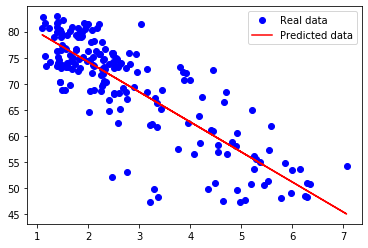

In [19]:
## 결과 확인
w = model.trainable_variables[0]
b = model.trainable_variables[1]
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,[0]] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

### Autograph를 이용한 속도 향상

학습 함수를 정적 그래프로 컴파일 해 봅시다. 이를 위해서 해야할 것은 문자 그대로, tf.function이라는 데코레이터를 위에 넣어주는것 뿐입니다

In [0]:
## autograph를 이용하여 static graph로 compile
@tf.function
def train_on_batch(model, x, y):
    with tf.GradientTape() as tape:
        predictions = model(x)
        loss = compute_loss(y, predictions)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
    return loss

In [21]:
## Training with stochastic gradient descent
t0 = time.time()

n_epoch = 100
for epoch in range(n_epoch):
    total_loss = 0.
    for x, y in dataset:
        loss = train_on_batch(model, x, y)
        total_loss += loss
    print('Epoch {0}: {1}'.format(epoch+1, total_loss/n_samples))

t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / n_epoch))

Epoch 1: 30.469465255737305
Epoch 2: 30.935848236083984
Epoch 3: 30.546247482299805
Epoch 4: 30.490966796875
Epoch 5: 30.48054313659668
Epoch 6: 30.5694637298584
Epoch 7: 30.953968048095703
Epoch 8: 30.751649856567383
Epoch 9: 30.88671112060547
Epoch 10: 30.64739418029785
Epoch 11: 30.700759887695312
Epoch 12: 30.618024826049805
Epoch 13: 30.371980667114258
Epoch 14: 30.704345703125
Epoch 15: 30.59943199157715
Epoch 16: 31.033891677856445
Epoch 17: 30.64720344543457
Epoch 18: 30.960979461669922
Epoch 19: 30.6879825592041
Epoch 20: 30.954410552978516
Epoch 21: 30.880903244018555
Epoch 22: 30.869281768798828
Epoch 23: 30.82054328918457
Epoch 24: 30.79850196838379
Epoch 25: 30.956497192382812
Epoch 26: 30.73699188232422
Epoch 27: 30.891712188720703
Epoch 28: 30.929882049560547
Epoch 29: 30.671646118164062
Epoch 30: 30.842924118041992
Epoch 31: 30.87882423400879
Epoch 32: 30.61960792541504
Epoch 33: 30.518474578857422
Epoch 34: 30.86924934387207
Epoch 35: 30.884077072143555
Epoch 36: 30.89

# Linear Regression using Keras Training API

In [0]:
## Dataset 만들기 - batch size : 10
batch_size = 10
dataset = tf.data.Dataset.from_tensor_slices((data[:,:1], data[:,1:]))
dataset = dataset.shuffle(n_samples).batch(batch_size).repeat()

In [0]:
## linear regression model function
def create_model():
    ## Sequential API 사용
    model = keras.Sequential()
    ## keras.layers.Dense layer - units는 output의 수를 의미함
    ## sequential model의 첫번째 layer에는 input_shape을 써줌
    model.add(keras.layers.Dense(units=1, input_shape=(1,)))
    return model

In [24]:
## model 생성
model = create_model()
## summary 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


model.compile()을 이용하여, loss funtion과 optimizer, 평가 metric을 정의할 수 있습니다

In [0]:
## model compile
learning_rate = 0.001
model.compile(optimizer=keras.optimizers.SGD(learning_rate),
             loss='MSE',
             metrics=['MSE'])

In [26]:
## 한 epoch이 몇 개의 batch(step)로 구성되는 지 계산
steps_per_epoch = n_samples // batch_size
print(steps_per_epoch)

19


In [27]:
n_epoch = 100
t0 = time.time()

history = model.fit(dataset, epochs=n_epoch, steps_per_epoch=steps_per_epoch)

t_end = time.time() - t0
print('epoch당 걸린 시간: %.3f 초' % (t_end / n_epoch))

Train for 19 steps
Epoch 1/100
19/19 [==============================] - 0s 14ms/step - loss: 3831.9414 - MSE: 3831.9414
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 2420.0740 - MSE: 2420.0740
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1783.9140 - MSE: 1783.9138
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 1492.9676 - MSE: 1492.9674
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 1357.9049 - MSE: 1357.9049
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 1289.8646 - MSE: 1289.8645
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 1249.5354 - MSE: 1249.5352
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 1224.2869 - MSE: 1224.2867
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 1200.9089 - MSE: 1200.9089
Epoch 10/100
19/19 [==============================] - 0s 2ms/step - loss: 1183.4

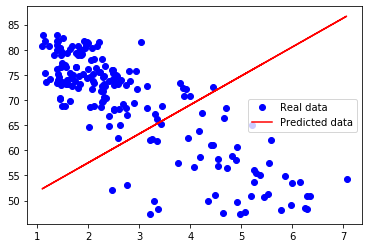

In [28]:
## 결과 확인
w = model.trainable_variables[0]
b = model.trainable_variables[1]
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,[0]] * w.numpy() + b.numpy(), 'r', label='Predicted data')
plt.legend()
plt.show()

결과가 예상과 다르게 나왔다면, 어느 부분이 잘못되었는지 찾아서 고쳐봅시다.

# Logistic Regression

## Pima Indians Diabetes Dataset for Binary Classification

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within five years.

이 dataset의 몇가지 주요 항목을 살펴보면 다음과 같습니다

- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지

8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다.

1. 임신 횟수
2. 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
3. 이완기 혈압 (mm Hg)
4. 삼두근 피부 두겹 두께 (mm)
5. 2 시간 혈청 인슐린 (mu U/ml)
6. 체질량 지수
7. 당뇨 직계 가족력
8. 나이 (세)
9. 5년 이내 당뇨병이 발병 여부

In [0]:
## input file
DATA_FILE = '/content/drive/My Drive/TensorFlow_Training_15th/data/pima-indians-diabetes.csv'

In [30]:
## input file 읽기
xy = np.loadtxt(DATA_FILE, delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

print(x_train.shape, y_train.shape)
print(xy)

(768, 8) (768, 1)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [0]:
## data preprocessing을 위한 minmax scaler
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [32]:
## data preprocessing
x_train = MinMaxScaler(x_train)
print(x_train)

[[0.3529412  0.74371856 0.59016395 ... 0.5007451  0.23441501 0.48333332]
 [0.05882353 0.42713568 0.5409836  ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.919598   0.52459013 ... 0.34724292 0.25362936 0.18333334]
 ...
 [0.29411766 0.6080402  0.59016395 ... 0.390462   0.07130657 0.15      ]
 [0.05882353 0.63316584 0.4918033  ... 0.44858423 0.11571307 0.43333334]
 [0.05882353 0.46733668 0.57377046 ... 0.45305514 0.10119555 0.03333334]]


In [0]:
## Hyper parameter 설정
## batch size, epoch, learning rate
n_data = x_train.shape[0]
batch_size = x_train.shape[0]
n_epoch = 1000
learning_rate = 0.4

In [0]:
## dataset 만들기
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(batch_size).repeat()

In [0]:
## model 만들기
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=1, activation='sigmoid', input_shape=(8,)))
    return model

In [36]:
## model 생성
model = create_model()
## summary 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [0]:
## model compile
## 1-class logistic regression이므로 loss는 binary cross-entropy 사용, metric은 accuracy
model.compile(optimizer=keras.optimizers.SGD(learning_rate),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [38]:
## 한 epoch이 몇 개의 batch(step)로 구성되는 지 계산
steps_per_epoch = n_data // batch_size
print(steps_per_epoch)

1


In [39]:
## Training
history = model.fit(dataset, epochs=n_epoch, steps_per_epoch=steps_per_epoch)

Train for 1 steps
Epoch 1/1000
1/1 [==============================] - 0s 260ms/step - loss: 0.6940 - accuracy: 0.6445
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.6458
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.6484
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6902 - accuracy: 0.6484
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.6471
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.6471
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.6484
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.6484
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.6854 - accuracy: 0.6484
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.649

In [40]:
## accuracy 확인
## model.evaluate은 정답이 있는 data의 경우(validation set) 결과를 확인할 때 사용함

model.evaluate(dataset, steps=steps_per_epoch)

1/1 [==============================] - 0s 56ms/step - loss: 0.4947 - accuracy: 0.7643


[0.49472594261169434, 0.76432294]

In [41]:
## 정답이 없는 data(test set)의 경우에는 model.predict 사용
model.predict(dataset, steps=steps_per_epoch)

array([[0.79347676],
       [0.30943206],
       [0.24034281],
       [0.1515842 ],
       [0.29079065],
       [0.28284407],
       [0.22363028],
       [0.44223952],
       [0.26775426],
       [0.16709688],
       [0.1922327 ],
       [0.61844116],
       [0.21146782],
       [0.3190334 ],
       [0.36420265],
       [0.2215244 ],
       [0.19981994],
       [0.29528704],
       [0.09535754],
       [0.24684158],
       [0.1506584 ],
       [0.53613216],
       [0.18139055],
       [0.17741244],
       [0.43287855],
       [0.13508746],
       [0.5492816 ],
       [0.22510014],
       [0.7013094 ],
       [0.33127332],
       [0.9147298 ],
       [0.17395909],
       [0.46044156],
       [0.33721346],
       [0.20823412],
       [0.7198013 ],
       [0.659365  ],
       [0.4604762 ],
       [0.09860283],
       [0.13050713],
       [0.50556326],
       [0.6432855 ],
       [0.37779328],
       [0.18653148],
       [0.19279253],
       [0.35351786],
       [0.26691803],
       [0.631

In [42]:
## model.fit, evaluate, predict는 dataset이 아닌 data도 직접 입력으로 받을 수 있음
model = create_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate),
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.evaluate(x_train, y_train)

768/768 [==============================] - 0s 122us/sample - loss: 0.8790 - accuracy: 0.3503


[0.8789979169766108, 0.3502604]

In [43]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch)

Train on 768 samples
Epoch 1/1000
768/768 [==============================] - 0s 232us/sample - loss: 0.8790 - accuracy: 0.3503
Epoch 2/1000
768/768 [==============================] - 0s 5us/sample - loss: 0.7983 - accuracy: 0.3581
Epoch 3/1000
768/768 [==============================] - 0s 5us/sample - loss: 0.7448 - accuracy: 0.3685
Epoch 4/1000
768/768 [==============================] - 0s 5us/sample - loss: 0.7103 - accuracy: 0.4505
Epoch 5/1000
768/768 [==============================] - 0s 10us/sample - loss: 0.6883 - accuracy: 0.5872
Epoch 6/1000
768/768 [==============================] - 0s 6us/sample - loss: 0.6743 - accuracy: 0.6237
Epoch 7/1000
768/768 [==============================] - 0s 6us/sample - loss: 0.6653 - accuracy: 0.6250
Epoch 8/1000
768/768 [==============================] - 0s 4us/sample - loss: 0.6594 - accuracy: 0.6302
Epoch 9/1000
768/768 [==============================] - 0s 6us/sample - loss: 0.6554 - accuracy: 0.6263
Epoch 10/1000
768/768 [=================

In [44]:
model.evaluate(x_train, y_train)

768/768 [==============================] - 0s 48us/sample - loss: 0.4944 - accuracy: 0.7682


[0.49437068526943523, 0.7682292]

In [45]:
## n번째 data에 대한 예측값
import random
n = random.randrange(n_data)
print(n)
prediction = model.predict(x_train[[n]])
print(prediction)

234
[[0.1023858]]


In [46]:
## n번째 data에 대한 정답
label = y_train[n]
print(label)

[0.]


In [47]:
if (prediction>=0.5) == label:
    print("correct prediction")
else:
    print("wrong prediction")

correct prediction
